Вы работаете маркетинговым аналитиком в онлайне-школе SkyAnalytics.

1 августа прошел продающий бесплатный вебинар, на котором была продающая часть (с описанием всех плюсов нашей школы) и часть спикера-аналитика (с описанием профессии и практикой).

Ваша задача - проанализировать эффективность данного вебинара.

В таблице logs хранятся заходы и выходы клиентов с вебинара
В таблице clients хранится информация о канале привлечения клиента
В таблицах email_reg (по электронной почте), vk_reg (через ВКонтакте), fb_reg (через Facebook), tg_reg (через Telegram), inst_reg (через Instagram) хранится информация о регистрации пользователей с различных площадок.

Обратите внимание на два момента:

1. Изучите конверсию в посещение вебинара из регистрации на вебинар с различных площадок. Можете ли вы выявить площадку (блогера / паблик / группу), которая накручивает регистрации?

In [423]:
import pandas as pd

In [424]:
logs = pd.read_csv('logs.csv', parse_dates = ['t_came', 't_left'], dayfirst = True, sep = ';')

In [425]:
logs

,id_webinar,id_user,t_came,t_left
0,1341312,34217410,2022-08-01 12:25:00,2022-08-01 13:00:00
1,1341312,34322153,2022-08-01 12:03:00,2022-08-01 12:23:00
2,1341312,34386258,2022-08-01 12:43:00,2022-08-01 13:14:00
3,1341312,34323708,2022-08-01 12:02:00,2022-08-01 12:21:00
4,1341312,34316732,2022-08-01 12:02:00,2022-08-01 12:24:00
...,...,...,...,...
1430,1341312,34379041,2022-08-01 12:02:00,2022-08-01 12:11:00
1431,1341312,34215199,2022-08-01 12:03:00,2022-08-01 12:08:00
1432,1341312,34233190,2022-08-01 12:41:00,2022-08-01 13:23:00
1433,1341312,34432122,2022-08-01 12:32:00,2022-08-01 12:37:00


In [426]:
clients = pd.read_csv('clients.csv', sep = ';')

In [427]:
clients

,id_user,source
0,34214513,?utm_source=telegram%adv=public1W%WSJ%3543%A
1,34432122,?utm_source=instagram%placement=blogger4I%FPY%...
2,34332094,?utm_source=telegram%adv=public1W%VRI%6516%J
3,34273819,?utm_source=telegram%adv=public3M%HSJ%6142%K
4,34385079,?utm_source=facebook%fbadv=source2R%TIY%8021%C
...,...,...
1252,34359444,?utm_source=telegram%adv=public3F%HMV%8033%L
1253,34281608,?utm_source=vkontakte%advert=group2C%RAT%9247%Q
1254,34428279,?utm_source=instagram%placement=blogger1Q%YCQ%...
1255,34358410,?utm_source=email%domain=yandexX%BZC%2294%P


In [428]:
fb = pd.read_csv('fb_reg.csv', parse_dates = ['time_reg'], dayfirst = True, sep = ';')

In [429]:
fb

,id_reg,source_label,time_reg
0,20103531,source3,2022-07-08
1,20103233,source3,2022-07-28
2,20104134,source1,2022-07-01
3,20104933,source3,2022-07-01
4,20105645,source1,2022-07-15
...,...,...,...
2658,20104775,source1,2022-07-18
2659,20104606,source2,2022-07-05
2660,20105599,source2,2022-07-19
2661,20104702,source3,2022-07-04


In [430]:
fb.source_label.unique()

array(['source3', 'source1', 'source2'], dtype=object)

In [431]:
inst = pd.read_csv('inst_reg.csv', parse_dates = ['time_reg'], dayfirst = True, sep = ';')

In [432]:
inst

,id_reg,blogger_label,time_reg
0,10039124,blogger4,2022-07-19
1,10037109,blogger1,2022-07-07
2,10036734,blogger3,2022-07-22
3,10037369,blogger1,2022-07-16
4,10036270,blogger1,2022-07-08
...,...,...,...
5250,10037096,blogger1,2022-07-14
5251,10035846,blogger4,2022-07-22
5252,10038150,blogger1,2022-07-03
5253,10036234,blogger1,2022-07-29


In [433]:
inst.blogger_label.unique()

array(['blogger4', 'blogger1', 'blogger3', 'blogger2'], dtype=object)

In [434]:
email = pd.read_csv('email_reg.csv', parse_dates = ['time_reg'], dayfirst = True, sep = ';')

In [435]:
email

,id_reg,domain_label,time_reg
0,34012013,gmail,2022-07-21
1,34012014,gmail,2022-07-28
2,34012015,gmail,2022-07-12
3,34012016,yandex,2022-07-12
4,34012017,gmail,2022-07-29
...,...,...,...
3123,34015136,yandex,2022-07-18
3124,34015137,yandex,2022-07-19
3125,34015138,outlook,2022-07-20
3126,34015139,outlook,2022-07-13


In [436]:
email.domain_label.unique()

array(['gmail', 'yandex', 'outlook'], dtype=object)

In [437]:
vk = pd.read_csv('vk_reg.csv', parse_dates = ['time_reg'], dayfirst = True, sep = ';')

In [438]:
vk

,id_reg,group_label,time_reg
0,7644908,group2,2022-07-14
1,7644013,group3,2022-07-28
2,7644018,group2,2022-07-08
3,7644082,group3,2022-07-30
4,7643497,group3,2022-07-08
...,...,...,...
1726,7644354,group2,2022-07-03
1727,7644098,group2,2022-07-09
1728,7644902,group2,2022-07-18
1729,7644820,group2,2022-07-14


In [439]:
vk.group_label.unique()

array(['group2', 'group3', 'group1'], dtype=object)

In [440]:
tg = pd.read_csv('tg_reg.csv', parse_dates = ['time_reg'], dayfirst = True, sep = ';')

In [441]:
tg

,id_reg,public_label,time_reg
0,100202855.0,public3,2020-07-19
1,100200861.0,public3,2020-07-02
2,100201118.0,public2,2020-07-17
3,100202704.0,public1,2020-07-16
4,100200132.0,public1,2020-07-05
...,...,...,...
3205,NaN,public4,2020-07-14
3206,NaN,public4,2020-07-14
3207,NaN,public4,2020-07-14
3208,NaN,public4,2020-07-14


In [442]:
tg.public_label.unique()

array(['public3', 'public2', 'public1', 'public4'], dtype=object)

In [443]:
logs_clients = logs.merge(clients, on = 'id_user')

In [444]:
logs_clients

,id_webinar,id_user,t_came,t_left,source
0,1341312,34217410,2022-08-01 12:25:00,2022-08-01 13:00:00,?utm_source=telegram%adv=public2L%POR%9677%A
1,1341312,34322153,2022-08-01 12:03:00,2022-08-01 12:23:00,?utm_source=telegram%adv=public3I%QDX%8153%K
2,1341312,34386258,2022-08-01 12:43:00,2022-08-01 13:14:00,?utm_source=instagram%placement=blogger1H%SYP%...
3,1341312,34323708,2022-08-01 12:02:00,2022-08-01 12:21:00,?utm_source=instagram%placement=blogger2W%JMA%...
4,1341312,34316732,2022-08-01 12:02:00,2022-08-01 12:24:00,?utm_source=telegram%adv=public2K%AXI%4938%O
...,...,...,...,...,...
1430,1341312,34359953,2022-08-01 12:11:00,2022-08-01 12:11:00,?utm_source=email%domain=yandexA%UNU%8078%Y
1431,1341312,34390989,2022-08-01 12:04:00,2022-08-01 12:06:00,?utm_source=instagram%placement=blogger2A%GPD%...
1432,1341312,34215199,2022-08-01 12:03:00,2022-08-01 12:08:00,?utm_source=instagram%placement=blogger4J%CXE%...
1433,1341312,34233190,2022-08-01 12:41:00,2022-08-01 13:23:00,?utm_source=vkontakte%advert=group1F%WJW%7883%C


In [445]:
users_cnt_unique = logs_clients.id_user.nunique()
users_cnt_unique

1257

In [446]:
logs_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1434
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_webinar  1435 non-null   int64         
 1   id_user     1435 non-null   int64         
 2   t_came      1435 non-null   datetime64[ns]
 3   t_left      1435 non-null   datetime64[ns]
 4   source      1435 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 67.3+ KB


In [447]:
def source_finder(i):
    if i.find('facebook') != -1:
        return 'facebook'
    elif i.find('instagram') != -1:
        return 'instagram'
    elif i.find('vkontakte') != -1:
        return 'vk'
    elif i.find('email') != -1:
        return 'email'
    elif i.find('telegram') != -1:
        return 'telegram'
    else:
        return 'none'

In [448]:
logs_clients['source_name'] = logs_clients['source'].apply(source_finder)

In [449]:
logs_clients

,id_webinar,id_user,t_came,t_left,source,source_name
0,1341312,34217410,2022-08-01 12:25:00,2022-08-01 13:00:00,?utm_source=telegram%adv=public2L%POR%9677%A,telegram
1,1341312,34322153,2022-08-01 12:03:00,2022-08-01 12:23:00,?utm_source=telegram%adv=public3I%QDX%8153%K,telegram
2,1341312,34386258,2022-08-01 12:43:00,2022-08-01 13:14:00,?utm_source=instagram%placement=blogger1H%SYP%...,instagram
3,1341312,34323708,2022-08-01 12:02:00,2022-08-01 12:21:00,?utm_source=instagram%placement=blogger2W%JMA%...,instagram
4,1341312,34316732,2022-08-01 12:02:00,2022-08-01 12:24:00,?utm_source=telegram%adv=public2K%AXI%4938%O,telegram
...,...,...,...,...,...,...
1430,1341312,34359953,2022-08-01 12:11:00,2022-08-01 12:11:00,?utm_source=email%domain=yandexA%UNU%8078%Y,email
1431,1341312,34390989,2022-08-01 12:04:00,2022-08-01 12:06:00,?utm_source=instagram%placement=blogger2A%GPD%...,instagram
1432,1341312,34215199,2022-08-01 12:03:00,2022-08-01 12:08:00,?utm_source=instagram%placement=blogger4J%CXE%...,instagram
1433,1341312,34233190,2022-08-01 12:41:00,2022-08-01 13:23:00,?utm_source=vkontakte%advert=group1F%WJW%7883%C,vk


In [450]:
logs_clients[logs_clients['source_name'] == 'none']

,id_webinar,id_user,t_came,t_left,source,source_name


In [451]:
def label_finder(i):
    if i.find('public1') != -1:
        return 'public1'
    elif i.find('public2') != -1:
        return 'public2'
    elif i.find('public3') != -1:
        return 'public3'
    elif i.find('public4') != -1:
        return 'public4'
    elif i.find('group1') != -1:
        return 'group1'
    elif i.find('group2') != -1:
        return 'group2'
    elif i.find('group3') != -1:
        return 'group3'
    elif i.find('gmail') != -1:
        return 'gmail'
    elif i.find('yandex') != -1:
        return 'yandex'
    elif i.find('outlook') != -1:
        return 'outlook'
    elif i.find('blogger1') != -1:
        return 'blogger1'
    elif i.find('blogger2') != -1:
        return 'blogger2'
    elif i.find('blogger3') != -1:
        return 'blogger3'
    elif i.find('blogger4') != -1:
        return 'blogger4'
    elif i.find('source1') != -1:
        return 'source1'
    elif i.find('source2') != -1:
        return 'source2'
    elif i.find('source3') != -1:
        return 'source3'
    else:
        return 'none'

In [452]:
logs_clients['label_name'] = logs_clients['source'].apply(label_finder)

In [453]:
logs_clients

,id_webinar,id_user,t_came,t_left,source,source_name,label_name
0,1341312,34217410,2022-08-01 12:25:00,2022-08-01 13:00:00,?utm_source=telegram%adv=public2L%POR%9677%A,telegram,public2
1,1341312,34322153,2022-08-01 12:03:00,2022-08-01 12:23:00,?utm_source=telegram%adv=public3I%QDX%8153%K,telegram,public3
2,1341312,34386258,2022-08-01 12:43:00,2022-08-01 13:14:00,?utm_source=instagram%placement=blogger1H%SYP%...,instagram,blogger1
3,1341312,34323708,2022-08-01 12:02:00,2022-08-01 12:21:00,?utm_source=instagram%placement=blogger2W%JMA%...,instagram,blogger2
4,1341312,34316732,2022-08-01 12:02:00,2022-08-01 12:24:00,?utm_source=telegram%adv=public2K%AXI%4938%O,telegram,public2
...,...,...,...,...,...,...,...
1430,1341312,34359953,2022-08-01 12:11:00,2022-08-01 12:11:00,?utm_source=email%domain=yandexA%UNU%8078%Y,email,yandex
1431,1341312,34390989,2022-08-01 12:04:00,2022-08-01 12:06:00,?utm_source=instagram%placement=blogger2A%GPD%...,instagram,blogger2
1432,1341312,34215199,2022-08-01 12:03:00,2022-08-01 12:08:00,?utm_source=instagram%placement=blogger4J%CXE%...,instagram,blogger4
1433,1341312,34233190,2022-08-01 12:41:00,2022-08-01 13:23:00,?utm_source=vkontakte%advert=group1F%WJW%7883%C,vk,group1


In [454]:
logs_clients[logs_clients['label_name'] == 'none']

,id_webinar,id_user,t_came,t_left,source,source_name,label_name


In [455]:
fb_gr = fb.groupby('source_label')['id_reg'].count().reset_index()

In [456]:
fb_gr.rename(columns = {'id_reg' : 'users_cnt', 'source_label': 'label'}, inplace = True)

In [457]:
fb_gr['conversion'] = round((fb_gr['users_cnt'] / users_cnt_unique), 2)

In [458]:
fb_gr['source'] = 'facebook'

In [459]:
fb_gr

,label,users_cnt,conversion,source
0,source1,671,0.53,facebook
1,source2,1028,0.82,facebook
2,source3,964,0.77,facebook


In [460]:
inst_gr = inst.groupby('blogger_label')['id_reg'].count().reset_index()

In [461]:
inst_gr.rename(columns = {'id_reg' : 'users_cnt', 'blogger_label': 'label'}, inplace = True)

In [462]:
inst_gr['conversion'] = round((inst_gr['users_cnt'] / users_cnt_unique), 2)

In [463]:
inst_gr['source'] = 'instagram'

In [464]:
inst_gr

,label,users_cnt,conversion,source
0,blogger1,1611,1.28,instagram
1,blogger2,841,0.67,instagram
2,blogger3,743,0.59,instagram
3,blogger4,2060,1.64,instagram


In [465]:
email_gr = email.groupby('domain_label')['id_reg'].count().reset_index()

In [466]:
email_gr.rename(columns = {'id_reg' : 'users_cnt', 'domain_label': 'label'}, inplace = True)

In [467]:
email_gr['conversion'] = round((email_gr['users_cnt'] / users_cnt_unique), 2)

In [468]:
email_gr['source'] = 'email'

In [469]:
email_gr

,label,users_cnt,conversion,source
0,gmail,1170,0.93,email
1,outlook,1000,0.80,email
2,yandex,958,0.76,email


In [470]:
vk_gr = vk.groupby('group_label')['id_reg'].count().reset_index()

In [471]:
vk_gr.rename(columns = {'id_reg' : 'users_cnt', 'group_label': 'label'}, inplace = True)

In [472]:
vk_gr['conversion'] = round((vk_gr['users_cnt'] / users_cnt_unique), 2)

In [473]:
vk_gr['source'] = 'vk'

In [474]:
vk_gr

,label,users_cnt,conversion,source
0,group1,605,0.48,vk
1,group2,627,0.50,vk
2,group3,499,0.40,vk


In [475]:
tg_gr = tg.groupby('public_label')['id_reg'].count().reset_index()

In [476]:
tg_gr.rename(columns = {'id_reg' : 'users_cnt', 'public_label': 'label'}, inplace = True)

In [477]:
tg_gr['conversion'] = round((tg_gr['users_cnt'] / users_cnt_unique), 2)

In [478]:
tg_gr['source'] = 'telegram'

In [479]:
tg_gr

,label,users_cnt,conversion,source
0,public1,1440,1.15,telegram
1,public2,869,0.69,telegram
2,public3,770,0.61,telegram
3,public4,0,0.00,telegram


In [480]:
df = pd.concat([fb_gr, inst_gr, email_gr, vk_gr, tg_gr])
df

,label,users_cnt,conversion,source
0,source1,671,0.53,facebook
1,source2,1028,0.82,facebook
2,source3,964,0.77,facebook
0,blogger1,1611,1.28,instagram
1,blogger2,841,0.67,instagram
2,blogger3,743,0.59,instagram
3,blogger4,2060,1.64,instagram
0,gmail,1170,0.93,email
1,outlook,1000,0.80,email
2,yandex,958,0.76,email


In [481]:
def cheat_finder(conversion):
    if conversion >= 1.0:
        return True
    else:
        return False

In [482]:
df['cheat'] = df['conversion'].apply(cheat_finder)

In [483]:
df

,label,users_cnt,conversion,source,cheat
0,source1,671,0.53,facebook,False
1,source2,1028,0.82,facebook,False
2,source3,964,0.77,facebook,False
0,blogger1,1611,1.28,instagram,True
1,blogger2,841,0.67,instagram,False
2,blogger3,743,0.59,instagram,False
3,blogger4,2060,1.64,instagram,True
0,gmail,1170,0.93,email,False
1,outlook,1000,0.80,email,False
2,yandex,958,0.76,email,False


In [484]:
df[df['cheat'] == True]

,label,users_cnt,conversion,source,cheat
0,blogger1,1611,1.28,instagram,True
3,blogger4,2060,1.64,instagram,True
0,public1,1440,1.15,telegram,True


Расписание вебинара:

- Начало первого продающего блока: 12:00
- Начало теоретического блока про аналитику: 12:15
- Начало второй продающей части: 12:50
- Начало практического блока про аналитику: 13:05
- Окончание вебинара: 14:00

2. Изучите посещаемость вебинара с точки зрения притока и оттока.
- Сопоставьте отток с расписанием вебинара и подсветите ту часть вебинара, которую необходимо улучшить. Напишите рекомендации для продающего менеджера и для спикера-аналитика.

In [485]:
import datetime as dt

In [486]:
first_sale_start = dt.datetime(2022, 8, 1, 12, 0, 0)

In [487]:
theory_start = dt.datetime(2022, 8, 1, 12, 15, 0)

In [488]:
second_sale_start = dt.datetime(2022, 8, 1, 12, 50, 0)

In [489]:
practice_start = dt.datetime(2022, 8, 1, 13, 5, 0)

In [490]:
webinar_end = dt.datetime(2022, 8, 1, 14, 0, 0)

In [491]:
def first_sale_finder(time):
    if first_sale_start < time < theory_start:
        return 0
    else: 
        return 1

In [492]:
def theory_finder(time):
    if first_sale_start < time < second_sale_start:
        return 0
    else: 
        return 1

In [493]:
def second_sale_finder(time):
    if first_sale_start < time < practice_start:
        return 0
    else: 
        return 1

In [494]:
def practice_finder(time):
    if first_sale_start < time < webinar_end:
        return 0
    else: 
        return 1

In [495]:
logs_clients['first_sale'] = logs['t_left'].apply(first_sale_finder)

In [496]:
logs_clients['theory'] = logs['t_left'].apply(theory_finder)

In [497]:
logs_clients['second_sale'] = logs['t_left'].apply(second_sale_finder)

In [498]:
logs_clients['practice'] = logs['t_left'].apply(practice_finder)

In [499]:
logs_clients

,id_webinar,id_user,t_came,t_left,source,source_name,label_name,first_sale,theory,second_sale,practice
0,1341312,34217410,2022-08-01 12:25:00,2022-08-01 13:00:00,?utm_source=telegram%adv=public2L%POR%9677%A,telegram,public2,1,1,0,0
1,1341312,34322153,2022-08-01 12:03:00,2022-08-01 12:23:00,?utm_source=telegram%adv=public3I%QDX%8153%K,telegram,public3,1,0,0,0
2,1341312,34386258,2022-08-01 12:43:00,2022-08-01 13:14:00,?utm_source=instagram%placement=blogger1H%SYP%...,instagram,blogger1,1,1,1,0
3,1341312,34323708,2022-08-01 12:02:00,2022-08-01 12:21:00,?utm_source=instagram%placement=blogger2W%JMA%...,instagram,blogger2,1,0,0,0
4,1341312,34316732,2022-08-01 12:02:00,2022-08-01 12:24:00,?utm_source=telegram%adv=public2K%AXI%4938%O,telegram,public2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1430,1341312,34359953,2022-08-01 12:11:00,2022-08-01 12:11:00,?utm_source=email%domain=yandexA%UNU%8078%Y,email,yandex,0,0,0,0
1431,1341312,34390989,2022-08-01 12:04:00,2022-08-01 12:06:00,?utm_source=instagram%placement=blogger2A%GPD%...,instagram,blogger2,0,0,0,0
1432,1341312,34215199,2022-08-01 12:03:00,2022-08-01 12:08:00,?utm_source=instagram%placement=blogger4J%CXE%...,instagram,blogger4,1,1,1,0
1433,1341312,34233190,2022-08-01 12:41:00,2022-08-01 13:23:00,?utm_source=vkontakte%advert=group1F%WJW%7883%C,vk,group1,1,0,0,0


In [500]:
logs_gr = logs_clients.groupby(['id_webinar']).agg({'first_sale':'sum', 'theory':'sum', 'second_sale':'sum', 'practice': 'sum', 'id_user': 'count'}).reset_index()

In [501]:
logs_gr

,id_webinar,first_sale,theory,second_sale,practice,id_user
0,1341312,1240,807,658,16,1435


In [502]:
logs_gr['first_sale_conv'] = logs_gr['first_sale'] / logs_gr['id_user']
logs_gr['theory_conv'] = logs_gr['theory'] / logs_gr['first_sale']
logs_gr['second_sale_conv'] = logs_gr['second_sale'] / logs_gr['theory']
logs_gr['practice_conv'] = logs_gr['practice'] / logs_gr['second_sale']
logs_gr['reg_2_end_conv'] = logs_gr['practice'] / logs_gr['id_user']

In [503]:
logs_gr

,id_webinar,first_sale,theory,second_sale,practice,id_user,first_sale_conv,theory_conv,second_sale_conv,practice_conv,reg_2_end_conv
0,1341312,1240,807,658,16,1435,0.864111,0.650806,0.815366,0.024316,0.01115


- Иногда требуется дополнительно отправлять пуш- или смс-уведомление зарегистрированным пользователям, чтобы позвать их на вебинар (тем, кто не пришел к началу). Такая коммуникация отправлялась один раз в течение нашего вебинара. Сможете ли вы определить, когда именно она была отправлена?

In [504]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [505]:
logs_gr_t_came = logs.groupby('t_came')['id_user'].count().reset_index()

In [506]:
logs_gr_t_came.rename(columns = {'id_user': 'users_cnt'}, inplace = True)

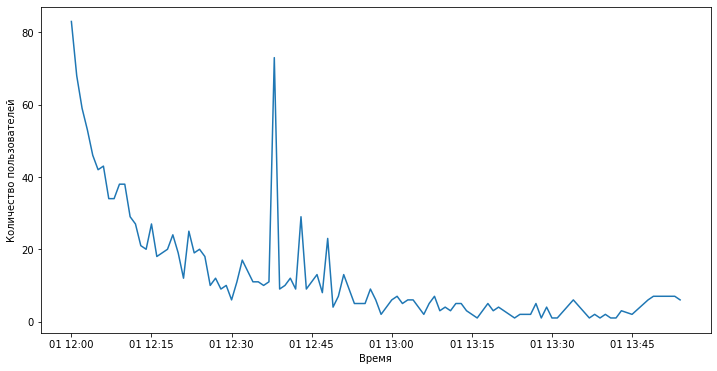

In [507]:
plt.figure(figsize=(12,6))
plt.plot(logs_gr_t_came['t_came'], logs_gr_t_came['users_cnt'])
plt.xlabel('Время')
plt.ylabel('Количество пользователей')

plt.show()

In [508]:
logs_gr_t_came_sort = logs_gr_t_came.sort_values(by = 'users_cnt', ascending = False)
logs_gr_t_came_sort

,t_came,users_cnt
0,2022-08-01 12:00:00,83
38,2022-08-01 12:38:00,73
1,2022-08-01 12:01:00,68
2,2022-08-01 12:02:00,59
3,2022-08-01 12:03:00,53
...,...,...
88,2022-08-01 13:31:00,1
87,2022-08-01 13:30:00,1
85,2022-08-01 13:28:00,1
81,2022-08-01 13:23:00,1


- Зависит ли время, в течение которого клиент остается на вебинаре, от его канала привлечения?

In [509]:
logs_clients

,id_webinar,id_user,t_came,t_left,source,source_name,label_name,first_sale,theory,second_sale,practice
0,1341312,34217410,2022-08-01 12:25:00,2022-08-01 13:00:00,?utm_source=telegram%adv=public2L%POR%9677%A,telegram,public2,1,1,0,0
1,1341312,34322153,2022-08-01 12:03:00,2022-08-01 12:23:00,?utm_source=telegram%adv=public3I%QDX%8153%K,telegram,public3,1,0,0,0
2,1341312,34386258,2022-08-01 12:43:00,2022-08-01 13:14:00,?utm_source=instagram%placement=blogger1H%SYP%...,instagram,blogger1,1,1,1,0
3,1341312,34323708,2022-08-01 12:02:00,2022-08-01 12:21:00,?utm_source=instagram%placement=blogger2W%JMA%...,instagram,blogger2,1,0,0,0
4,1341312,34316732,2022-08-01 12:02:00,2022-08-01 12:24:00,?utm_source=telegram%adv=public2K%AXI%4938%O,telegram,public2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1430,1341312,34359953,2022-08-01 12:11:00,2022-08-01 12:11:00,?utm_source=email%domain=yandexA%UNU%8078%Y,email,yandex,0,0,0,0
1431,1341312,34390989,2022-08-01 12:04:00,2022-08-01 12:06:00,?utm_source=instagram%placement=blogger2A%GPD%...,instagram,blogger2,0,0,0,0
1432,1341312,34215199,2022-08-01 12:03:00,2022-08-01 12:08:00,?utm_source=instagram%placement=blogger4J%CXE%...,instagram,blogger4,1,1,1,0
1433,1341312,34233190,2022-08-01 12:41:00,2022-08-01 13:23:00,?utm_source=vkontakte%advert=group1F%WJW%7883%C,vk,group1,1,0,0,0


In [510]:
df2 = logs_clients.groupby('source_name').agg({'first_sale':'sum', 'theory':'sum', 'second_sale':'sum', 'practice': 'sum', 'id_user': 'count'}).reset_index()

In [511]:
df2

,source_name,first_sale,theory,second_sale,practice,id_user
0,email,161,99,82,1,186
1,facebook,253,171,132,5,294
2,instagram,401,267,218,7,463
3,telegram,305,189,158,2,352
4,vk,120,81,68,1,140


In [512]:
df2['first_sale_conv'] = df2['first_sale'] / df2['id_user']
df2['theory_conv'] = df2['theory'] / df2['first_sale']
df2['second_sale_conv'] = df2['second_sale'] / df2['theory']
df2['practice_conv'] = df2['practice'] / df2['second_sale']
df2['reg_2_end_conv'] = df2['practice'] / df2['id_user']

In [513]:
df2

,source_name,first_sale,theory,second_sale,practice,id_user,first_sale_conv,theory_conv,second_sale_conv,practice_conv,reg_2_end_conv
0,email,161,99,82,1,186,0.865591,0.614907,0.828283,0.012195,0.005376
1,facebook,253,171,132,5,294,0.860544,0.675889,0.771930,0.037879,0.017007
2,instagram,401,267,218,7,463,0.866091,0.665835,0.816479,0.032110,0.015119
3,telegram,305,189,158,2,352,0.866477,0.619672,0.835979,0.012658,0.005682
4,vk,120,81,68,1,140,0.857143,0.675000,0.839506,0.014706,0.007143
